## LIBRERIAS

In [2]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EXTRACCIÓN DATOS PDF - CSV

In [42]:
# Información cruda
name = "TP-2;c.csv"
raw_data = """
1 -31,57 MLWS 33,00 51 -44,07 MLWS 45,50 8 36 344 31,3
2 -31,82 MLWS 33,25 2 36 2 125 52 -44,32 MLWS 45,75 10 36 354 25,0
3 -32,07 MLWS 33,50 6 36 8 42 53 -44,57 MLWS 46,00 13 36 367 19,2
4 -32,32 MLWS 33,75 5 36 13 50 54 -44,82 MLWS 46,25 11 36 378 22,7
5 -32,57 MLWS 34,00 5 36 18 50 55 -45,07 MLWS 46,50 10 36 388 25,0
6 -32,82 MLWS 34,25 4 36 22 63 56 -45,32 MLWS 46,75 10 36 398 25,0
7 -33,07 MLWS 34,50 4 36 26 63 57 -45,57 MLWS 47,00 12 36 410 20,8
8 -33,32 MLWS 34,75 5 36 31 50 58 -45,82 MLWS 47,25 11 36 421 22,7
9 -33,57 MLWS 35,00 5 36 36 50 59 -46,07 MLWS 47,50 10 36 431 25,0
10 -33,82 MLWS 35,25 5 36 41 50 60 -46,32 MLWS 47,75 11 36 442 22,7
11 -34,07 MLWS 35,50 4 36 45 63 61 -46,57 MLWS 48,00 11 36 453 22,7
12 -34,32 MLWS 35,75 6 36 51 42 62 -46,82 MLWS 48,25 11 36 464 22,7
13 -34,57 MLWS 36,00 4 36 55 63 63 -47,07 MLWS 48,50 11 36 475 22,7
14 -34,82 MLWS 36,25 5 36 60 50 64 -47,32 MLWS 48,75 10 36 485 25,0
15 -35,07 MLWS 36,50 5 36 65 50 65 -47,57 MLWS 49,00 12 36 497 20,8
16 -35,32 MLWS 36,75 6 36 71 42 66 -47,82 MLWS 49,25 14 36 511 17,9
17 -35,57 MLWS 37,00 6 36 77 42 67 -48,07 MLWS 49,50 12 36 523 20,8
18 -35,82 MLWS 37,25 6 36 83 42 68 -48,32 MLWS 49,75 13 36 536 19,2
19 -36,07 MLWS 37,50 5 36 88 50 69 -48,57 MLWS 50,00 10 36 546 25,0
20 -36,32 MLWS 37,75 7 36 95 36 70 -48,82 MLWS 50,25 12 36 558 20,8
21 -36,57 MLWS 38,00 6 36 101 42 71 -49,07 MLWS 50,50 13 36 571 19,2
22 -36,82 MLWS 38,25 7 36 108 36 72 -49,32 MLWS 50,75 13 36 584 19,2
23 -37,07 MLWS 38,50 7 36 115 36 73 -49,57 MLWS 51,00 10 36 594 25,0
24 -37,32 MLWS 38,75 8 36 123 31 74 -49,82 MLWS 51,25 10 36 604 25,0
25 -37,57 MLWS 39,00 7 36 130 36 75 -50,07 MLWS 51,50 10 36 614 25,0
26 -37,82 MLWS 39,25 7 36 137 36 76 -50,32 MLWS 51,75 11 36 625 22,7
27 -38,07 MLWS 39,50 8 36 145 31 77 -50,57 MLWS 52,00 11 72 636 22,7
28 -38,32 MLWS 39,75 7 36 152 36 78 -50,82 MLWS 52,25 14 72 650 17,9
29 -38,57 MLWS 40,00 7 36 159 36 79 -51,07 MLWS 52,50 14 72 664 17,9
30 -38,82 MLWS 40,25 7 36 166 36 80 -51,32 MLWS 52,75 14 72 678 17,9
31 -39,07 MLWS 40,50 7 36 173 36 81 -51,57 MLWS 53,00 14 72 692 17,9
32 -39,32 MLWS 40,75 6 36 179 42 82 -51,82 MLWS 53,25 15 72 707 16,7
33 -39,57 MLWS 41,00 7 36 186 36 83 -52,07 MLWS 53,50 15 72 722 16,7
34 -39,82 MLWS 41,25 7 36 193 36 84 -52,32 MLWS 53,75 15 72 737 16,7
35 -40,07 MLWS 41,50 7 36 200 36 85 -52,57 MLWS 54,00 15 72 752 16,7
36 -40,32 MLWS 41,75 8 36 208 31 86 -52,82 MLWS 54,25 16 72 768 15,6
37 -40,57 MLWS 42,00 8 36 216 31 87 -53,07 MLWS 54,50 16 72 784 15,6
38 -40,82 MLWS 42,25 7 36 223 36 88 -53,32 MLWS 54,75 16 72 800 15,6
39 -41,07 MLWS 42,50 6 36 229 42 89 -53,57 MLWS 55,00 16 72 816 15,6
40 -41,32 MLWS 42,75 6 36 235 42 90 -53,82 MLWS 55,25 13 72 829 19,2
41 -41,57 MLWS 43,00 7 36 242 36 91 -54,07 MLWS 55,50 15 72 844 16,7
42 -41,82 MLWS 43,25 8 36 250 31 92 -54,32 MLWS 55,75 16 72 860 15,6
43 -42,07 MLWS 43,50 12 36 262 21 93 -54,57 MLWS 56,00 13 72 873 19,2
44 -42,32 MLWS 43,75 12 36 274 21 94 -54,82 MLWS 56,25 14 72 887 17,9
45 -42,57 MLWS 44,00 13 36 287 19 95 -55,07 MLWS 56,50 14 100 901 17,9
46 -42,82 MLWS 44,25 10 36 297 25 96 -55,32 MLWS 56,75 14 100 915 17,9
47 -43,07 MLWS 44,50 10 36 307 25 97 -55,57 MLWS 57,00 14 110 929 17,9
48 -43,32 MLWS 44,75 10 36 317 25 98 -55,82 MLWS 57,25 14 110 943 17,9
49 -43,57 MLWS 45,00 10 36 327 25 99 -56,07 MLWS 57,50 16 110 959 15,6
50 -43,82 MLWS 45,25 9 36 336 28 100 -56,32 MLWS 57,75 16 110 975 15,6
101 -56,57 MLWS 58,00 23 110 998 10,9 151 -69,07 MLWS 70,50 19 250 2.687 13,2
102 -56,82 MLWS 58,25 23 110 1.021 10,9 152 -69,32 MLWS 70,75 19 250 2.706 13,2
103 -57,07 MLWS 58,50 25 110 1.046 10,0 153 -69,57 MLWS 71,00 19 250 2.725 13,2
104 -57,32 MLWS 58,75 25 110 1.071 10,0 154 -69,82 MLWS 71,25 19 250 2.744 13,2
105 -57,57 MLWS 59,00 25 110 1.096 10,0 155 -70,07 MLWS 71,50 20 250 2.764 12,5
106 -57,82 MLWS 59,25 55 120 1.151 4,5 156 -70,32 MLWS 71,75 22 250 2.786 11,4
107 -58,07 MLWS 59,50 50 120 1.201 5,0 157 -70,57 MLWS 72,00 22 250 2.808 11,4
108 -58,32 MLWS 59,75 40 140 1.241 6,3 158 -70,82 MLWS 72,25 21 250 2.829 11,9
109 -58,57 MLWS 60,00 42 140 1.283 6,0 159 -71,07 MLWS 72,50 22 250 2.851 11,4
110 -58,82 MLWS 60,25 40 140 1.323 6,3 160 -71,32 MLWS 72,75 21 250 2.872 11,9
111 -59,07 MLWS 60,50 35 160 1.358 7,1 161 -71,57 MLWS 73,00 22 250 2.894 11,4
112 -59,32 MLWS 60,75 35 160 1.393 7,1 162 -71,82 MLWS 73,25 22 250 2.916 11,4
113 -59,57 MLWS 61,00 32 160 1.425 7,8 163 -72,07 MLWS 73,50 20 250 2.936 12,5
114 -59,82 MLWS 61,25 29 200 1.454 8,6 164 -72,32 MLWS 73,75 20 250 2.956 12,5
115 -60,07 MLWS 61,50 28 200 1.482 8,9 165 -72,57 MLWS 74,00 20 250 2.976 12,5
116 -60,32 MLWS 61,75 29 200 1.511 8,6 166 -72,82 MLWS 74,25 22 250 2.998 11,4
117 -60,57 MLWS 62,00 29 200 1.540 8,6 167 -73,07 MLWS 74,50 22 250 3.020 11,4
118 -60,82 MLWS 62,25 30 200 1.570 8,3 168 -73,32 MLWS 74,75 21 250 3.041 11,9
119 -61,07 MLWS 62,50 29 200 1.599 8,6 169 -73,57 MLWS 75,00 15 250 3.056 16,7
120 -61,32 MLWS 62,75 28 200 1.627 8,9 170 -73,82 MLWS 75,25 15 250 3.071 16,7
121 -61,57 MLWS 63,00 28 200 1.655 8,9 171 -74,07 MLWS 75,50 10 250 3.081 25,0
122 -61,82 MLWS 63,25 28 200 1.683 8,9 172 -74,32 MLWS 75,75 15 250 3.096 16,7
123 -62,07 MLWS 63,50 30 200 1.713 8,3 173 -74,57 MLWS 76,00 10 250 3.106 25,0
124 -62,32 MLWS 63,75 30 200 1.743 8,3 174 -74,82 MLWS 76,25 15 250 3.121 16,7
125 -62,57 MLWS 64,00 35 230 1.778 7,1 175 -75,07 MLWS 76,50 15 250 3.136 16,7
126 -62,82 MLWS 64,25 32 230 1.810 7,8 176 -75,32 MLWS 76,75 15 250 3.151 16,7
127 -63,07 MLWS 64,50 35 230 1.845 7,1 177 -75,57 MLWS 77,00 16 250 3.167 15,6
128 -63,32 MLWS 64,75 35 230 1.880 7,1 178 -75,82 MLWS 77,25 10 250 3.177 25,0
129 -63,57 MLWS 65,00 35 230 1.915 7,1 179 -76,07 MLWS 77,50 3.177 -
130 -63,82 MLWS 65,25 36 230 1.951 6,9 180 -76,32 MLWS 77,75 3.177 -
131 -64,07 MLWS 65,50 36 230 1.987 6,9 181 -76,57 MLWS 78,00 3.177 -
132 -64,32 MLWS 65,75 33 230 2.020 7,6 182 -76,82 MLWS 78,25 3.177 -
133 -64,57 MLWS 66,00 33 230 2.053 7,6 183 -77,07 MLWS 78,50 3.177 -
134 -64,82 MLWS 66,25 35 230 2.088 7,1 184 -77,32 MLWS 78,75 3.177 -
135 -65,07 MLWS 66,50 36 230 2.124 6,9 185 -77,57 MLWS 79,00 3.177 -
136 -65,32 MLWS 66,75 36 230 2.160 6,9 186 -77,82 MLWS 79,25 3.177 -
137 -65,57 MLWS 67,00 33 230 2.193 7,6 187 -78,07 MLWS 79,50 3.177 -
138 -65,82 MLWS 67,25 36 230 2.229 6,9 188 -78,32 MLWS 79,75 3.177 -
139 -66,07 MLWS 67,50 33 230 2.262 7,6 189 -78,57 MLWS 80,00 3.177 -
140 -66,32 MLWS 67,75 35 230 2.297 7,1 190 -78,82 MLWS 80,25 3.177 -
141 -66,57 MLWS 68,00 35 230 2.332 7,1 191 -79,07 MLWS 80,50 3.177 -
142 -66,82 MLWS 68,25 36 230 2.368 6,9 192 -79,32 MLWS 80,75 3.177 -
143 -67,07 MLWS 68,50 36 230 2.404 6,9 193 -79,57 MLWS 81,00 3.177 -
144 -67,32 MLWS 68,75 38 230 2.442 6,6 194 -79,82 MLWS 81,25 3.177 -
145 -67,57 MLWS 69,00 38 230 2.480 6,6 195 -80,07 MLWS 81,50 3.177 -
146 -67,82 MLWS 69,25 36 230 2.516 6,9 196 -80,32 MLWS 81,75 3.177 -
147 -68,07 MLWS 69,50 38 230 2.554 6,6 197 -80,57 MLWS 82,00 3.177 -
148 -68,32 MLWS 69,75 38 230 2.592 6,6 198 -80,82 MLWS 82,25 3.177 -
149 -68,57 MLWS 70,00 38 230 2.630 6,6 199 -81,07 MLWS 82,50 3.177 -
150 -68,82 MLWS 70,25 38 230 2.668 6,6 200 -81,32 MLWS 82,75 3.177 -
201 -81,57 MLWS 83,00 3.177 - 251 -94,07 MLWS 95,50 30 200 3.207 8,3
202 -81,82 MLWS 83,25 - 3.177 252 -94,32 MLWS 95,75 31 200 3.238 8,1
203 -82,07 MLWS 83,50 3.177 - 253 -94,57 MLWS 96,00 31 200 3.269 8,1
204 -82,32 MLWS 83,75 3.177 - 254 -94,82 MLWS 96,25 33 210 3.302 7,6
205 -82,57 MLWS 84,00 3.177 - 255 -95,07 MLWS 96,50 30 210 3.332 8,3
206 -82,82 MLWS 84,25 3.177 - 256 -95,32 MLWS 96,75 31 210 3.363 8,1
207 -83,07 MLWS 84,50 3.177 - 257 -95,57 MLWS 97,00 32 210 3.395 7,8
208 -83,32 MLWS 84,75 3.177 - 258 -95,82 MLWS 97,25 33 210 3.428 7,6
209 -83,57 MLWS 85,00 3.177 - 259 -96,07 MLWS 97,50 31 210 3.459 8,1
210 -83,82 MLWS 85,25 3.177 - 260 -96,32 MLWS 97,75 31 210 3.490 8,1
211 -84,07 MLWS 85,50 3.177 - 261 -96,57 MLWS 98,00 32 210 3.522 7,8
212 -84,32 MLWS 85,75 3.177 - 262 -96,82 MLWS 98,25 32 210 3.554 7,8
213 -84,57 MLWS 86,00 3.177 - 263 -97,07 MLWS 98,50 33 210 3.587 7,6
214 -84,82 MLWS 86,25 3.177 - 264 -97,32 MLWS 98,75 33 210 3.620 7,6
215 -85,07 MLWS 86,50 3.177 - 265 -97,57 MLWS 99,00 27 210 3.647 9,3
216 -85,32 MLWS 86,75 3.177 - 266 -97,82 MLWS 99,25 33 210 3.680 7,6
217 -85,57 MLWS 87,00 3.177 - 267 -98,07 MLWS 99,50 33 210 3.713 7,6
218 -85,82 MLWS 87,25 3.177 - 268 -98,32 MLWS 99,75 33 210 3.746 7,6
219 -86,07 MLWS 87,50 3.177 - 269 -98,57 MLWS 100,00 32 210 3.778 7,8
220 -86,32 MLWS 87,75 3.177 - 270 -98,82 MLWS 100,25 33 210 3.811 7,6
221 -86,57 MLWS 88,00 3.177 - 271 -99,07 MLWS 100,50 33 210 3.844 7,6
222 -86,82 MLWS 88,25 3.177 - 272 -99,32 MLWS 100,75 33 210 3.877 7,6
223 -87,07 MLWS 88,50 3.177 - 273 -99,57 MLWS 101,00 33 210 3.910 7,6
224 -87,32 MLWS 88,75 3.177 - 274 -99,82 MLWS 101,25 33 210 3.943 7,6
"""

# Usar expresión regular para dividir las filas correctamente
# pattern = r"(\d+\s-\d+,\d+\sMLWS.*?)(?=\s\d+\s-\d+,\d+\sMLWS|$)"
pattern = r"(\d+\s-.*?)(?=\s\d+\s-|$)"
matches = re.findall(pattern, raw_data, re.DOTALL)

# Dividir cada fila en columnas
data = []
for match in matches:
    parts = match.split()
    n = parts[0]
    toe_level = f"{parts[1]} {parts[2]}"
    graduation = parts[3]
    blow_count = parts[4] if len(parts) > 4 else ""
    energy_kj = parts[5] if len(parts) > 5 else ""
    cumulative_blow_count = parts[6] if len(parts) > 6 else ""
    penetration_per_blow = parts[7] if len(parts) > 7 else ""
    comments = " ".join(parts[8:]) if len(parts) > 8 else ""
    data.append(
        [
            n,
            toe_level,
            graduation,
            blow_count,
            energy_kj,
            cumulative_blow_count,
            penetration_per_blow,
            comments,
        ]
    )

# Crear un DataFrame
columns = [
    "N°",
    "Toe Level",
    "Graduation",
    "Blow_Count",
    "Energy(kJ)",
    "Cumulative_blow_Count",
    "Penetration_per_blow(mm/blow)",
    "comments",
]
df = pd.DataFrame(data, columns=columns)

# Convertir la columna "N°" a tipo numérico (en caso de que no lo sea)
df["N°"] = pd.to_numeric(df["N°"], errors="coerce")

# Ordenar el DataFrame por la columna "N°" en orden ascendente
df = df.sort_values(by="N°", ascending=True)

# Exportar a un archivo CSV (opcional)
df.to_csv(name, sep="\t", index=False)

## IMAGENES UNICAS

In [37]:
carpeta = "Bridge\\EJE_1"  # blue 'g'
color = "b"
#carpeta = "Bridge\\EJE_2"  # green 'b'
#color = "g"
#carpeta = "Transition Platform"  # red 'r'
#color = "r"
#carpeta = "Platform\\QUAY 1-2"  # cyan 'c'
#color = "c"
#carpeta = "Platform\\QUAY 3-4"  # magenta 'm'
#color = "m"

Se han graficado 4 archivos CSV de la carpeta Bridge\EJE_1


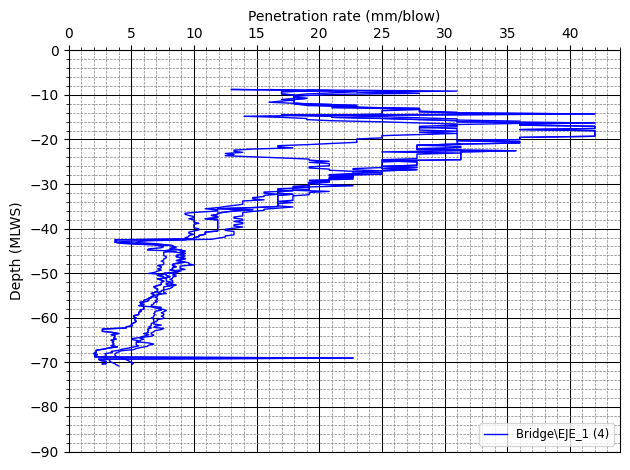

In [38]:
# Crear una figura
fig, ax = plt.subplots()

# Contar el número de archivos CSV en la carpeta
archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith(".csv")]
num_archivos = len(archivos_csv)

# Definir el label con el nombre de la carpeta y el número de archivos
label = f"{carpeta} ({num_archivos})"

# Iterar sobre los archivos CSV en la carpeta
for i, archivo in enumerate(archivos_csv):
    # Leer el archivo CSV
    table = pd.read_csv(os.path.join(carpeta, archivo), sep="\t", header=0)

    # Limpiar y procesar los datos
    table = table.dropna(subset=["Blow_Count"])
    table["Toe Level"] = table["Toe Level"].str.replace("MLWS", "", regex=False)
    table = table.map(
        lambda x: str(x).replace(",", ".") if isinstance(x, str) else x
    )
    table["Toe Level"] = pd.to_numeric(table["Toe Level"])
    table["Penetration_per_blow(mm/blow)"] = pd.to_numeric(
        table["Penetration_per_blow(mm/blow)"]
    )
    table_cleaned = table.dropna(subset=["Penetration_per_blow(mm/blow)"])

    # Definir las variables para graficar
    x = table_cleaned["Penetration_per_blow(mm/blow)"]
    y = table_cleaned["Toe Level"]

    # Graficar con el color especificado
    ax.plot(x, y, linestyle="-", linewidth=1, color=color, label=label if i == 0 else "")

print(f"Se han graficado {num_archivos} archivos CSV de la carpeta {carpeta}")
# Ajustar el eje x en la parte superior
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")

# Etiquetas y leyenda
plt.xlabel("Penetration rate (mm/blow)")
plt.ylabel("Depth (MLWS)")
plt.ylim(-90,0)
plt.grid(which="major", color="black", linestyle="-", linewidth=0.75)
plt.minorticks_on()
plt.grid(which="minor", color="gray", linestyle="--", linewidth=0.5)
plt.legend(loc="lower right",  fontsize='small')  # Ajustar la leyenda para que no se solape

# Guardar la gráfica
nombre_imagen = os.path.join("Images", "Bridge_EJE_1" + ".png")
plt.savefig(nombre_imagen, dpi=600, bbox_inches="tight")
plt.tight_layout()
# Mostrar la gráfica
plt.show()

## VARIAS CARPETAS

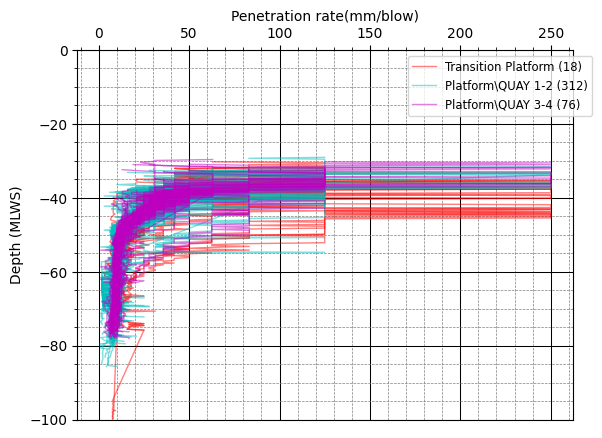

In [43]:
# Lista de carpetas donde están los archivos CSV
carpetas = [
    #"Bridge\EJE_2", #blue 'g'
    #"Bridge\EJE_1",  #green 'b'
    "Transition Platform", #red 'r'
    "Platform\\QUAY 1-2", #cyan 'c'
    "Platform\\QUAY 3-4", #magenta 'm'
]

# Lista de colores para las líneas (puedes añadir más colores si es necesario)
colores = [
    #"b", 
    #"g", 
    "r", 
    "c", 
    "m", 
    "y", 
    "k"
]

# Crear una figura
fig, ax = plt.subplots()

# Iterar sobre cada carpeta
for carpeta_idx, carpeta in enumerate(carpetas):
    color_carpeta = colores[carpeta_idx % len(colores)] 
    nombre_carpeta = carpeta  # Obtener el nombre de la carpeta

    # Contar el número de archivos CSV en la carpeta
    archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith(".csv")]
    num_archivos = len(archivos_csv)

    # Definir el label con el nombre de la carpeta y el número de archivos
    label = f"{nombre_carpeta} ({num_archivos})"

    # Iterar sobre los archivos CSV en la carpeta actual
    for i, archivo in enumerate(archivos_csv):
        # Leer el archivo CSV
        table = pd.read_csv(os.path.join(carpeta, archivo), sep="\t", header=0)

        # Limpiar y procesar los datos
        table = table.dropna(subset=["Blow_Count"])
        table["Toe Level"] = table["Toe Level"].str.replace("MLWS", "", regex=False)
        table = table.map(
            lambda x: str(x).replace(",", ".") if isinstance(x, str) else x
        )
        table["Toe Level"] = pd.to_numeric(table["Toe Level"])
        table["Penetration_per_blow(mm/blow)"] = pd.to_numeric(
            table["Penetration_per_blow(mm/blow)"]
        )
        table_cleaned = table.dropna(subset=["Penetration_per_blow(mm/blow)"])

        # Definir las variables para graficar
        x = table_cleaned["Penetration_per_blow(mm/blow)"]
        y = table_cleaned["Toe Level"]

        # Graficar con un color distinto para cada carpeta
        ax.plot(x, y, linestyle="-", linewidth=1, color=color_carpeta,alpha=0.5 , label=label if i == 0 else "",)

# Ajustar el eje x en la parte superior
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")

# Etiquetas y leyenda
plt.xlabel("Penetration rate(mm/blow)")
plt.ylabel("Depth (MLWS)")
plt.ylim(-100,0)
plt.grid(which="major", color="black", linestyle="-", linewidth=0.75)
plt.minorticks_on()
plt.grid(which="minor", color="gray", linestyle="--", linewidth=0.5)
plt.legend( loc="best",bbox_to_anchor=(1.05, 1), fontsize='small')  # Ajustar la leyenda para que no se solape

# Guardar la gráfica
nombre_imagen = os.path.join("Images", "All_Zones.png")
plt.savefig(nombre_imagen, dpi=600, bbox_inches="tight")

# Mostrar la gráfica
plt.show()